In [31]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [32]:
model = torch.load('../data storage/prm_data_L8_CNN_3.pth')
model

OrderedDict([('conv.1.weight',
              tensor([[[[ 0.3163,  0.3278, -0.2434],
                        [ 0.3812, -0.2212, -0.1321],
                        [ 0.0263,  0.1998,  0.3791]]],
              
              
                      [[[-0.2386,  0.0251,  0.3689],
                        [ 0.1268, -0.0970, -0.1853],
                        [ 0.3747,  0.0700,  0.2254]]],
              
              
                      [[[ 0.2829, -0.3152,  0.0728],
                        [-0.0914,  0.3754,  0.1412],
                        [-0.3374,  0.3361,  0.2291]]],
              
              
                      [[[ 0.0614,  0.0812, -0.1008],
                        [-0.2043, -0.1300, -0.0523],
                        [-0.1521,  0.1796, -0.2892]]],
              
              
                      [[[ 0.2096,  0.4075, -0.1596],
                        [ 0.2784, -0.1472, -0.1586],
                        [ 0.2075,  0.0757,  0.0011]]]])),
             ('fc.0.weight',
            

In [33]:
# conv.1.weightの重みテンソルを取得
conv1_weight = model['conv.1.weight']
conv1_weight

tensor([[[[ 0.3163,  0.3278, -0.2434],
          [ 0.3812, -0.2212, -0.1321],
          [ 0.0263,  0.1998,  0.3791]]],


        [[[-0.2386,  0.0251,  0.3689],
          [ 0.1268, -0.0970, -0.1853],
          [ 0.3747,  0.0700,  0.2254]]],


        [[[ 0.2829, -0.3152,  0.0728],
          [-0.0914,  0.3754,  0.1412],
          [-0.3374,  0.3361,  0.2291]]],


        [[[ 0.0614,  0.0812, -0.1008],
          [-0.2043, -0.1300, -0.0523],
          [-0.1521,  0.1796, -0.2892]]],


        [[[ 0.2096,  0.4075, -0.1596],
          [ 0.2784, -0.1472, -0.1586],
          [ 0.2075,  0.0757,  0.0011]]]])

In [34]:
# NumPy配列に変換
conv1_weight_np = conv1_weight.cpu().numpy()

横ver

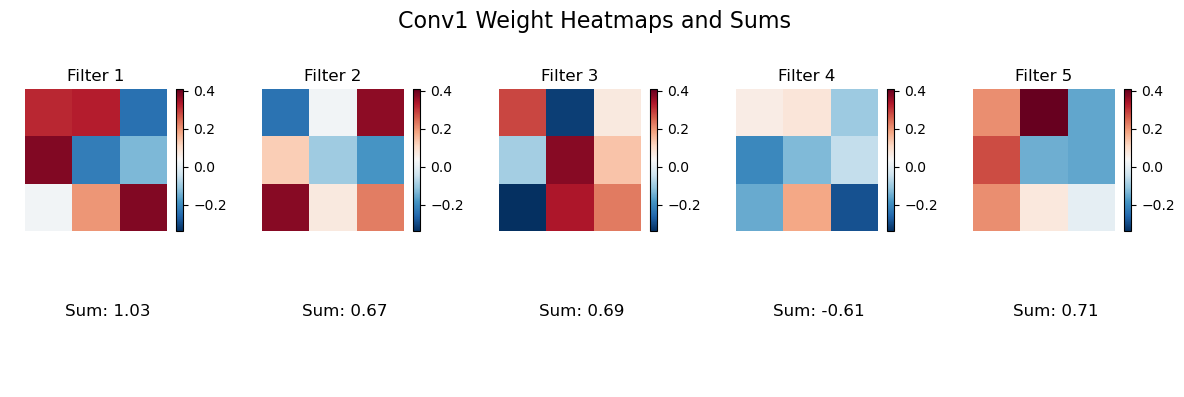

In [35]:
# 各重みフィルターに対して成分の和を計算
filter_sums = [np.sum(filter) for filter in conv1_weight_np]

# カラーマップの最小値を0以下に設定
min_value = min(np.min(conv1_weight_np), 0)
# 単一の最大値を取得
max_value = np.amax(conv1_weight_np)

# 5つの重みフィルターとその成分の和を1つの図にプロット
plt.figure(figsize=(12, 4))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(conv1_weight_np[i, 0], cmap='RdBu_r', vmin=min_value, vmax=max_value, interpolation='nearest')
    plt.colorbar()
    plt.title(f'Filter {i+1}')
    plt.axis('off')
    
    plt.subplot(2, 5, i+6)
    plt.text(0.5, 0.5, f'Sum: {filter_sums[i]:.2f}', fontsize=12, ha='center')
    plt.axis('off')

plt.suptitle('Conv1 Weight Heatmaps and Sums', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
# 図をファイルとして保存
# plt.savefig('../image storage/L8_CNN_filter.png')
plt.show()


縦ver

In [36]:
# # 各重みフィルターに対して成分の和を計算
# filter_sums = [np.sum(filter) for filter in conv1_weight_np]

# # カラーマップの最小値を0以下に設定
# min_value = min(np.min(conv1_weight_np), 0)
# # 単一の最大値を取得
# max_value = np.amax(conv1_weight_np)

# # グリッドの行数と列数を設定
# num_rows = 5
# num_cols = 2

# # フィギュアを作成
# plt.figure(figsize=(9, 12))

# for i in reversed(range(5)):
#     # ヒートマップを描画
#     plt.subplot(num_rows, num_cols, (4 - i) * num_cols + 1)
#     plt.imshow(conv1_weight_np[i, 0], cmap='RdBu_r', vmin=min_value, vmax=max_value, interpolation='nearest')
#     plt.colorbar()
#     plt.title(f'Filter {i + 1}')
#     plt.axis('off')

# # plt.suptitle('Conv1 Weight Heatmaps and Sums', fontsize=16)
# plt.tight_layout(rect=[0, 0, 1, 0.95])
# # 図をファイルとして保存
# plt.savefig('../image storage/L8_CNN_filter.png')
# plt.show()


In [37]:
fc_weight = model['fc.0.weight']
fc_weight

tensor([[-0.0924,  0.0231, -0.0213,  ...,  0.0292,  0.0541, -0.1116],
        [-0.0988,  0.0351, -0.0965,  ..., -0.1032,  0.0381, -0.0647],
        [ 0.0574, -0.1055, -0.0930,  ..., -0.1106,  0.0185, -0.0619],
        ...,
        [-0.2114, -0.1146, -0.0671,  ..., -0.2222, -0.0384, -0.2459],
        [-0.1977, -0.1309, -0.1260,  ..., -0.1832, -0.1792, -0.1915],
        [-0.1322, -0.1919, -0.0814,  ..., -0.1548, -0.1588, -0.0821]])

In [38]:
fc_weight.size()

torch.Size([100, 80])

In [39]:
# NumPy配列に変換
fc_weight_np = fc_weight.cpu().numpy()
# データを転置して正方形のデータに変形
fc_weight_np_square = fc_weight_np.T

In [40]:
fc_weight_np_square

array([[-0.09242123, -0.09883405,  0.0574379 , ..., -0.21144477,
        -0.19770816, -0.13220066],
       [ 0.02314242,  0.03505335, -0.10550527, ..., -0.11458965,
        -0.13085017, -0.1918628 ],
       [-0.02128446, -0.0965131 , -0.09303103, ..., -0.06709322,
        -0.126     , -0.08143909],
       ...,
       [ 0.02918929, -0.10320629, -0.11059798, ..., -0.22222838,
        -0.18318585, -0.15480013],
       [ 0.05405137,  0.03808666,  0.018548  , ..., -0.03844457,
        -0.17923029, -0.15878126],
       [-0.11158993, -0.06472768, -0.06187955, ..., -0.24593146,
        -0.1915046 , -0.08209919]], dtype=float32)

In [41]:
fc_weight_np_square.shape

(80, 100)

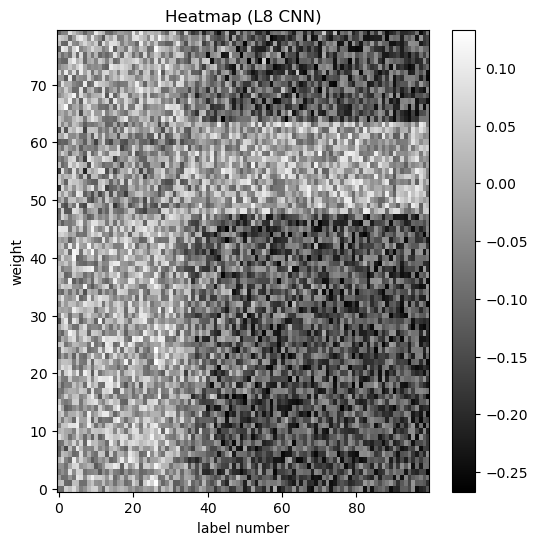

In [42]:
# ヒートマップをプロット（白黒）
plt.figure(figsize=(6, 6))
plt.imshow(fc_weight_np_square, cmap='gray', interpolation='nearest', origin='lower', aspect='auto')
plt.colorbar()
plt.title('Heatmap (L8 CNN)')


# x軸とy軸に名前を付ける
plt.ylabel('weight')
plt.xlabel('label number')
# 図をファイルとして保存
plt.savefig('../image storage/L8_CNN_weight.png')
plt.show()

In [43]:
fc_weight_np_square_sum = np.sum(fc_weight_np_square, axis=0)
fc_weight_np_square_sum

array([-1.9437920e+00, -6.7224950e-01, -1.7069876e+00, -8.6298084e-01,
        2.3112278e-01,  5.5300236e-01, -1.3265897e+00, -2.8963919e+00,
       -3.5082102e-03, -8.4284025e-01, -1.0839005e+00, -1.5486012e+00,
       -7.6018202e-01, -2.0557952e+00, -5.1519454e-02, -1.4912987e+00,
       -9.7977197e-01, -1.3190018e+00, -1.6168845e+00, -4.9588937e-01,
        3.1361648e-01, -1.1175247e+00, -8.4049255e-01, -1.4704154e+00,
       -5.3856319e-01, -1.3191568e+00,  6.5568012e-01,  1.7807446e-01,
       -2.1739097e+00, -1.3959134e+00, -1.1403809e+00, -1.1222345e+00,
       -1.5403302e+00, -2.4237006e+00, -3.9340668e+00, -3.8635368e+00,
       -4.8990812e+00, -6.0362873e+00, -4.6931648e+00, -5.1276422e+00,
       -7.1744585e+00, -5.9972067e+00, -7.8425775e+00, -7.4769716e+00,
       -6.6783934e+00, -7.6073475e+00, -5.9976354e+00, -7.9989481e+00,
       -7.5473833e+00, -9.0063114e+00, -8.0110846e+00, -7.8932819e+00,
       -7.9551392e+00, -8.7053757e+00, -8.6761551e+00, -8.0455303e+00,
      

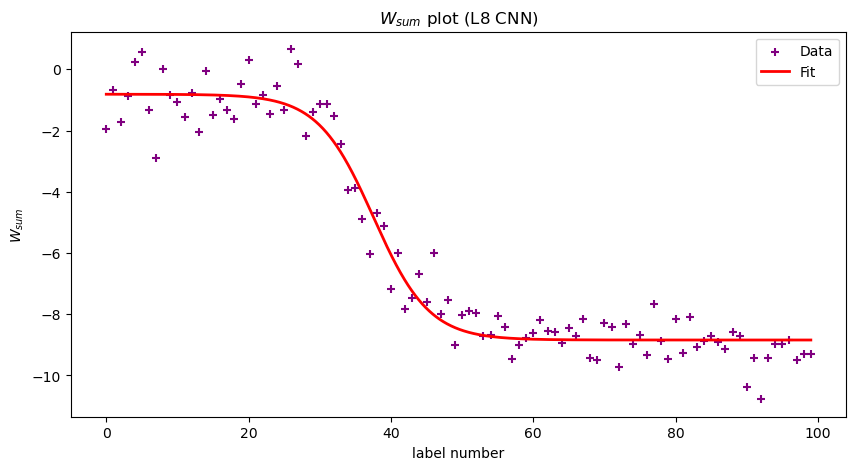

Fitted Parameters:
a: -4.013746013030978
b: 0.1281356415720092
c: -4.809499533854944
d: -4.827668440292677


In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# フィッティング用のtanh関数
def tanh_function(x, a, b, c, d):
    return a * np.tanh(b * x + c) + d

# データ
x = np.arange(len(fc_weight_np_square_sum))
y = fc_weight_np_square_sum

# tanh関数の初期推定値
initial_guess = [1.0, 0.1, 0.0, 0.0]  # パラメータ a, b, c, d の初期推定値

# tanh関数のパラメータを推定
params, covariance = curve_fit(tanh_function, x, y, p0=initial_guess)

# プロット
plt.figure(figsize=(10, 5))
plt.scatter(x, y, marker='+', color='purple', label='Data')
plt.title('$W_{sum}$ plot (L8 CNN)')
plt.xlabel('label number')
plt.ylabel('$W_{sum}$')

# フィッティング結果をプロットに追加
x_fit = np.linspace(min(x), max(x), 1000)
y_fit = tanh_function(x_fit, *params)
plt.plot(x_fit, y_fit, 'r-', label='Fit', linewidth=2)

plt.legend()
# 図をファイルとして保存
# plt.savefig('../image storage/L8_CNN_weight_sum.png')
plt.show()

# フィッティングされたパラメータ
print("Fitted Parameters:")
print("a:", params[0])
print("b:", params[1])
print("c:", params[2])
print("d:", params[3])


相転移点の算出

In [45]:
center_x = -params[2] / params[1]
print("Fitted Center X:", center_x)

beta = (0.0080808080808081 * center_x) + 0.2
print("beta:", beta)

Fitted Center X: 37.534439870518916
beta: 0.503308605014295
